<a href="https://colab.research.google.com/github/Swayam0407/FuelCellAnalysis/blob/main/fuelCell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [2]:
import pandas as pd
from pycaret.regression import *

In [4]:
# Read the uploaded dataset
data = pd.read_csv('/content/Fuel_cell_performance_data-Full.csv')

# Show the first few rows of the dataset
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [6]:

reg_setup = setup(
    data=data,
    target='Target2',
    train_size=0.7,     # 70% data for training
    normalize=True,
    transformation=True
)

,Description,Value
0,Session id,4664
1,Target,Target2
2,Target type,Regression
3,Original data shape,"(1000, 20)"
4,Transformed data shape,"(1000, 20)"
5,Transformed train set shape,"(700, 20)"
6,Transformed test set shape,"(300, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [7]:
# Compare different models
top_models = compare_models(n_select=4)

# Show the selected top models
top_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1256,0.0246,0.1564,0.9133,0.0733,0.1341,0.7830
lar,Least Angle Regression,0.1256,0.0246,0.1564,0.9133,0.0733,0.1341,0.0930
br,Bayesian Ridge,0.1257,0.0246,0.1564,0.9133,0.0732,0.1336,0.1170
ridge,Ridge Regression,0.1258,0.0247,0.1565,0.9132,0.0731,0.1332,0.0850
huber,Huber Regressor,0.1238,0.0251,0.1578,0.9119,0.0739,0.1355,0.1530
lightgbm,Light Gradient Boosting Machine,0.1577,0.0409,0.2018,0.8559,0.0891,0.1468,0.7230
par,Passive Aggressive Regressor,0.1637,0.0421,0.2044,0.8516,0.0943,0.1705,0.1430
gbr,Gradient Boosting Regressor,0.1722,0.0475,0.2175,0.8325,0.0966,0.1613,0.4310
xgboost,Extreme Gradient Boosting,0.1936,0.0602,0.2449,0.7883,0.1092,0.1832,0.7560
et,Extra Trees Regressor,0.2307,0.0800,0.2821,0.7195,0.1260,0.2227,0.7700


Processing:   0%|          | 0/84 [00:00<?, ?it/s]

[LinearRegression(n_jobs=-1),
 Lars(random_state=4664),
 BayesianRidge(),
 Ridge(random_state=4664)]

In [ ]:
# Finalize the top models
final_models = [finalize_model(model) for model in top_models]

# Show finalized models
final_models

In [9]:
# Make predictions using the finalized models
predictions = [predict_model(model) for model in final_models]

# Show the predictions for the first model
predictions[0].head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1253,0.0270,0.1642,0.9129,0.0748,0.1575


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,0.1253,0.0270,0.1642,0.9129,0.0748,0.1575


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1253,0.0269,0.1640,0.9131,0.0747,0.1570


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.1252,0.0269,0.1639,0.9132,0.0746,0.1566


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,Target1,Target3,Target4,Target5,Target2,prediction_label
38,71.400002,1.09,45.700001,12.37,141.429993,44.099998,0.136,254.100006,292,1.07,...,2.75,9133,31.299999,290,0.826,67.900002,3.22,20.370001,0.324,0.113873
45,68.500000,2.22,80.099998,39.02,108.300003,40.299999,0.329,214.000000,61,1.66,...,3.01,8191,21.299999,1874,0.870,73.099998,7.28,24.110001,1.928,1.668933
976,65.699997,1.55,91.000000,25.82,57.639999,26.200001,0.329,373.100006,249,0.99,...,2.83,5596,35.400002,1670,0.790,68.199997,8.89,61.070000,0.819,0.939609
429,36.400002,2.71,89.500000,34.02,168.979996,43.000000,0.278,291.700012,343,1.10,...,1.79,1609,24.700001,1182,0.935,77.800003,4.34,186.250000,1.942,1.850904
722,34.400002,1.57,83.800003,47.09,72.150002,45.000000,0.356,102.000000,326,0.70,...,2.85,3105,29.900000,771,0.827,64.900002,9.62,28.740000,1.089,1.072285


In [10]:
# Save the best model
best_model = finalize_model(top_models[0])

# Save the model to a file
save_model(best_model, '/content/best_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15',
                                              'Target1', 'Target3', 'Target4',
                                              'Target5'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 '/content/best_regressi

In [11]:
from google.colab import files
files.download('/content/best_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from pycaret.regression import load_model, predict_model
import pandas as pd


model = load_model('/content/best_regression_model')


data = pd.read_csv('/content/Fuel_cell_performance_data-Full.csv')

Transformation Pipeline and Model Successfully Loaded


In [14]:
# Make predictions on the test data
predictions = predict_model(model, data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.1250,0.0248,0.1576,0.9156,0.0728,0.1386


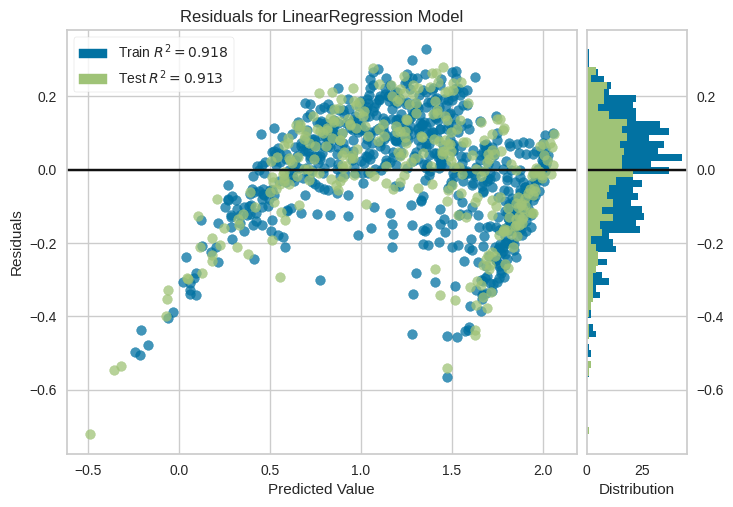

In [19]:
from pycaret.regression import plot_model
plot_model(model, plot='residuals')

In [27]:
# Actual and predicted values
y_true = data['Target2']
y_pred = predictions['prediction_label']

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


Mean Absolute Error (MAE): 0.12500600103114726
Mean Squared Error (MSE): 0.024836719345901294
Root Mean Squared Error (RMSE): 0.1575966983978449
R2 Score: 0.915609521536116
